<ipython-input-2-6be21604237c>:19: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Date'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-2-6be21604237c>:19: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Date'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-2-6be21604237c>:20: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Time'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-2-6be21604237c>:20: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Time'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-2-6be21604237c>:21: FutureWarning: In a future version of pandas all arguments of StringMethods.split except fo

      Train Loss          Step
Epoch                         
5435      0.0193  step=0016320
5440      0.0176  step=0016335
5445      0.0192  step=0016350
5450      0.0166  step=0016365
5455      0.0190  step=0016380


KeyError: ignored

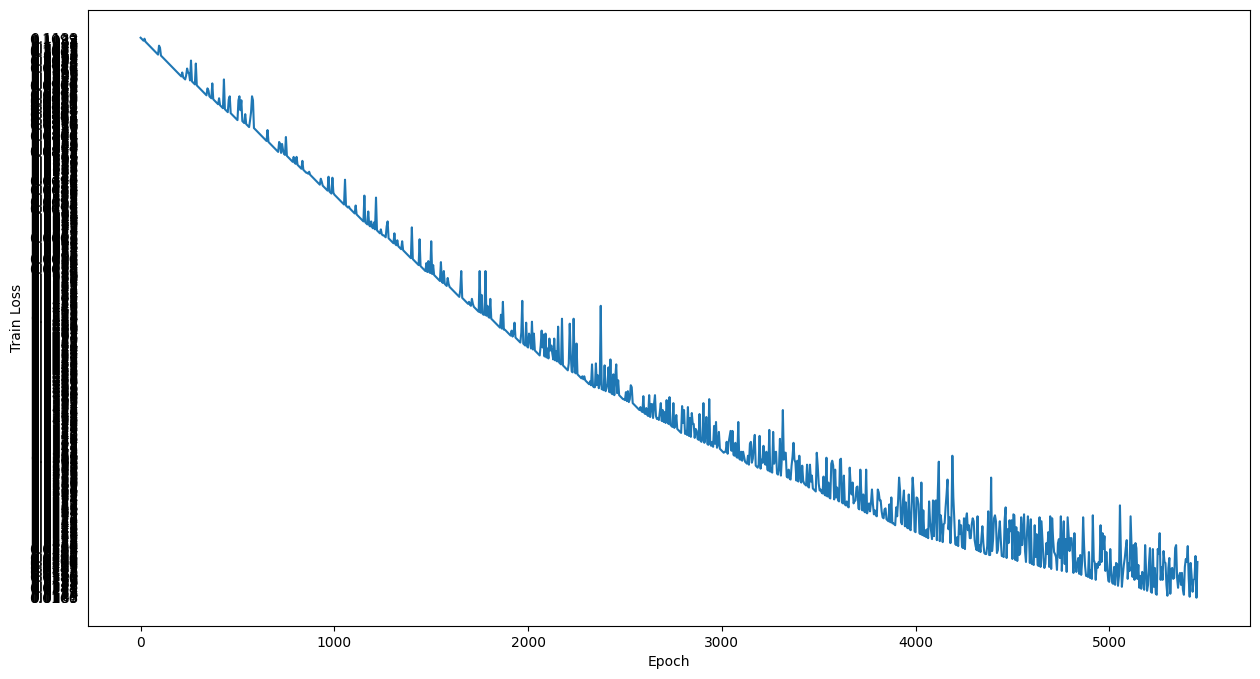

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import argparse

def loss_extarection(path):
  path_for_loss = '/content/loss.txt'
  with open(path, 'r') as log_file, open(path_for_loss, 'w') as loss_file:
      for line in enumerate(log_file):
          string = ''.join(map(str, line))
          if 'Train Loss' in string:
              loss_file.write(string)
  return path_for_loss

def loss_plot(path):
    df = pd.read_csv(path, names=['Train Loss', 'Train Steps/sec'])

    # extract info from tuple
    df['Date'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
    df['Time'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
    df['Step'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str

    df.iloc[:, 0] = df.iloc[:, 0].apply(lambda s: s[12:])
    df.iloc[:, 4] = df.iloc[:, 4].apply(lambda s: s[1:-1])
    df_loss = df[['Train Loss', 'Step']]

    epoch = []
    for i in range(df_loss.shape[0]):
      ep = 5 * i
      epoch.append(ep)
    df_loss['Epoch'] = epoch
    df_loss = df_loss.set_index('Epoch')
    print(df_loss.tail())
    # drawing a plot
    plt.figure(figsize=(15,8))
    plot = sns.lineplot(data=df_loss['Train Loss'])
    plot.tick_params(left=False)


    # reducing anount of printed labels
    ytick = []
    for i in range(df_loss.shape[0]):
        if i == 0 or i == df_loss.shape[0] - 1:
            ytick.append(float(df_loss['Train Loss'][i]))
        else:
            ytick.append(' ')
    ytick[-1] = min(df_loss['Train Loss'])
    # print(ytick)
    plot.set_yticks(df_loss['Train Loss'])
    plot.set_yticklabels(ytick)

def main(args):
  loss_plot(loss_extarection(args))

if __name__ == "__main__":
    # parser = argparse.ArgumentParser()
    # parser.add_argument("--log-path", type=str)
    # args = parser.parse_args()
    # main(args)
    path = '/content/log-1.txt'
    main(path)